# Problem Set 3

* Intro to Generic Programming (2nd half)

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using LinearAlgebra, Statistics,Plots,StaticArrays,BenchmarkTools,Polynomials,ForwardDiff,QuadGK

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Warning: Module JSON with build ID 33541892065587 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1033
┌ Info: Precompiling GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1260
┌ Warning: Module JSON with build ID 33541892065587 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1016
┌ Info: Skipping precompilation since __precompile__(false). Importing GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71].
└ @ Base loading.jl:1033
┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8

## Intro to Generic Programming

### Exercise 4

In [3]:
function newtonsmethod(p::Poly; x_0=0, tolerance=1E-7, maxiter=1000)
    # setup the algorithm
    x_old = x_0
    normdiff = Inf
    iter = 1
    p_prime=x->ForwardDiff.derivative(p,x)
    while normdiff > tolerance && iter <= maxiter
        x_new = x_old-p(x_old)/p_prime(x_old) # use the passed in map
        normdiff = norm(x_new - x_old)
        x_old = x_new
        iter+= 1
    end
    return (value = x_old, normdiff=normdiff, iter=iter) # A named tuple
end

newtonsmethod (generic function with 1 method)

In [4]:
p = Poly([2, -5, 2], :x)  # :x just gives a symbol for display
@time sol=newtonsmethod(p)
println("Fixed point = $(sol.value), and |f(x) - x| = $(sol.normdiff) in $(sol.iter)"*
        " iterations")

  0.192215 seconds (483.68 k allocations: 25.340 MiB)
Fixed point = 0.5, and |f(x) - x| = 3.4924596548080444e-10 in 6 iterations


In [5]:
# built-in roots(p)
@show roots(p);

roots(p) = [0.5, 2.0]


### Exercise 5

In [6]:
function trapezoidal_1(x::AbstractArray,f::AbstractArray)
    @assert length(f)==length(x)
    N=length(x)
    s=0.0
    
    for n in 1:N-1
        s=s+(((f[n]+f[n+1])/2)*(x[n+1]-x[n]))
    end
return s
end
    

trapezoidal_1 (generic function with 1 method)

In [7]:
x=zeros(101)
for i in eachindex(x)
    x[i]=0+0.01*(i-1)
end
f=x.^2;

In [8]:
@time trapezoidal_1(x,f)

  0.012018 seconds (29.62 k allocations: 1.587 MiB)


0.33335000000000004

In [9]:
function trapezoidal_2(x::AbstractRange,f::AbstractArray)
    @assert length(f)==length(x)
    N=length(x)
    s=0.0
    for n in 1:N-1
        s=s+(((f[n]+f[n+1])/2)*step(x))
    end
return s
end

trapezoidal_2 (generic function with 1 method)

In [10]:
x_range=0.0:0.01:1.0
f=x.^2;

In [11]:
@time trapezoidal_2(x_range,f)

  0.012952 seconds (33.19 k allocations: 1.791 MiB)


0.33335

In [12]:
function trapezoidal_3(f::Function,x_lb::Real,x_ub::Real,N::Real)
    x_step=(x_ub-x_lb)/(N-1)
    x_range=x_lb:x_step:x_ub
    map_vec=f.(x_range)
    s=0.0
    for n in 1:N-1
        s=s+(((map_vec[n]+map_vec[n+1])/2)*x_step)
    end
return s
end

trapezoidal_3 (generic function with 1 method)

In [54]:
sq(x)=x^2
@time trapezoidal_3(sq,0.0,1.0,101)

  0.009654 seconds (1.48 k allocations: 52.625 KiB)


0.3333499999999999

In [14]:
value, accuracy = quadgk(sq, 0.0, 1.0)

(0.3333333333333333, 5.551115123125783e-17)

In [62]:
function ploterror(f::Function,x_lb::Real,x_ub::Real,N::Real;int=trapezoidal_3)
    error=zeros(N-1)
    sol, accuracy = quadgk(f, x_lb, x_ub)
    for m in 2:N
        error[m-1]=norm(value-trapezoidal_3(sq,x_lb,x_ub,m))
    end
    return plot(error,label="Approximation error")
end

ploterror (generic function with 1 method)

* Unsolved puzzle : Set x in 0.0 and 0.1 and when N=12, the function gets error.

In [30]:
#==error=zeros(101-1);
for m in 1:101-1
error[m]=norm(value-trapezoidal_3(sq,0.0,0.1,m+1))
    end
    error
==#

BoundsError: BoundsError: attempt to access 11-element Array{Float64,1} at index [12]

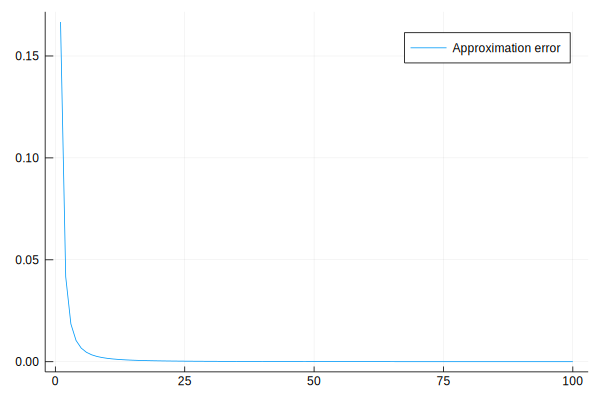

In [63]:
ploterror(sq,0.0,1.0,101)

### Exercise 6 INCOMETE

In [86]:
ex_6_obj(x)=trapezoidal_3(sq,0.0,x,50)    

G(x) = x->ForwardDiff.derivative(y->ex_6_obj(y),x)

G(1.0)

#55 (generic function with 1 method)

In [69]:
function trapezoidal_3(f::Function,x_lb::Real,x_ub::Real,N::Real)
    x_step=(x_ub-x_lb)/(N-1)
    x_range=x_lb:x_step:x_ub
    map_vec=f.(x_range)
    s=0.0
    for n in 1:N-1
        s=s+(((map_vec[n]+map_vec[n+1])/2)*x_step)
    end
return s
end

trapezoidal_3 (generic function with 1 method)

In [ ]:
sq(x)=x^2

In [70]:
? ForwardDiff.derivative

```
ForwardDiff.derivative(f, x::Real)
```

Return `df/dx` evaluated at `x`, assuming `f` is called as `f(x)`.

This method assumes that `isa(f(x), Union{Real,AbstractArray})`.

---

```
ForwardDiff.derivative(f!, y::AbstractArray, x::Real, cfg::DerivativeConfig = DerivativeConfig(f!, y, x), check=Val{true}())
```

Return `df!/dx` evaluated at `x`, assuming `f!` is called as `f!(y, x)` where the result is stored in `y`.

Set `check` to `Val{false}()` to disable tag checking. This can lead to perturbation confusion, so should be used with care.
